In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [146]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=42)

In [147]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [148]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

### Choosing the best k value

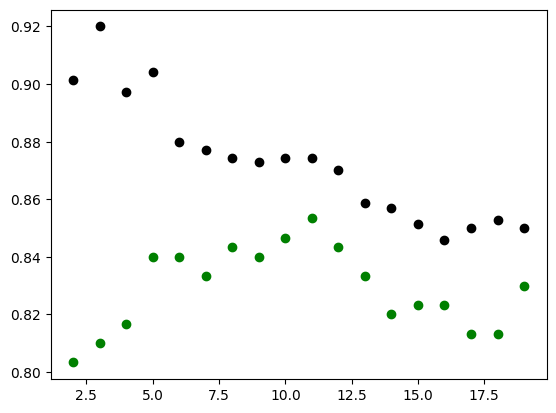

In [149]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
  
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Making the model

In [150]:
#KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    #create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    #fit the model
    KNN.fit(X_train, y_train)
    
    #get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    #predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [151]:
KNN_test, KNN_train, KNN_prediction = KNN(X_train, y_train, X_test, y_test, 11)
print(KNN_test, KNN_train)

0.8533333333333334 0.8742857142857143


In [152]:
KNN_prediction.shape

(300,)

### Evaluating the model

In [153]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test, KNN_prediction)

In [154]:
Scores = {
    "Model":["KNN"],\
    "Accuracy":[accuracy_score*100],\
    "Precision":[precision_score*100],\
    "Recall":[recall_score*100],\
    "F1":[f1_score*100]
    }

Scores=pd.DataFrame(Scores)
Scores

,Model,Accuracy,Precision,Recall,F1
0,KNN,85.333333,85.495062,85.333333,85.34725


# SVM models

In [155]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    #create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    #fit the model
    SVM.fit(X_train, y_train)
    
    #get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    #predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [156]:
#SVM classifier using linear kernel
SVM_linear_test, SVM_linear_train, SVM_linear_prediction = SVM(X_train, y_train, X_test, y_test, 'linear')
print(SVM_linear_test, SVM_linear_train)

0.7066666666666667 0.7257142857142858


In [157]:
#SVM classifier using RBF kernel
SVM_rbf_test, SVM_rbf_train, SVM_rbf_prediction = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(SVM_rbf_test, SVM_rbf_train)

0.8433333333333334 0.8942857142857142


In [158]:
#SVM classifier using sigmoid kernel
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(SVM_sigmoid_test, SVM_sigmoid_train)

0.49333333333333335 0.5114285714285715


In [159]:
#SVM classifier using polynomial kernel
SVM_poly_test, SVM_poly_train, SVM_poly_prediction = SVM(X_train, y_train, X_test, y_test, 'poly')
print(SVM_poly_test, SVM_poly_train)

0.8 0.8442857142857143


### Evaluating the models

In [160]:
accuracy_score_poly, precision_score_poly, recall_score_poly, f1_score_poly = Evaluate(y_test, SVM_poly_prediction)

accuracy_score_linear, precision_score_linear, recall_score_linear, f1_score_linear = Evaluate(y_test, SVM_linear_prediction)

accuracy_score_sigmoid, precision_score_sigmoid, recall_score_sigmoid, f1_score_sigmoid = Evaluate(y_test, SVM_sigmoid_prediction)

accuracy_score_rbf, precision_score_rbf, recall_score_rbf, f1_score_rbf = Evaluate(y_test, SVM_rbf_prediction)

TypeError: 'numpy.float64' object is not callable

In [ ]:
Scores = {
    "Model":["Linear SVM","RBF SVM","Sigmoid SVM","Poly SVM"],\
    "Accuracy":[accuracy_score_linear*100, accuracy_score_rbf*100, accuracy_score_sigmoid*100, accuracy_score_poly*100],\
    "Precision":[precision_score_linear*100, precision_score_rbf*100, precision_score_sigmoid*100, precision_score_poly*100],\
    "Recall":[recall_score_linear*100, recall_score_rbf*100, recall_score_sigmoid*100, recall_score_poly*100],\
    "F1":[f1_score_linear*100, f1_score_rbf*100, f1_score_sigmoid*100, f1_score_poly*100]
    }

Scores=pd.DataFrame(Scores)
Scores